In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import string
import re
sns.set_style('darkgrid')
sns.set_palette('Set2')
%matplotlib inline
#nltk.download('popular')
#nltk.download()

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

Read Data

In [ ]:
df = pd.read_csv('spam.csv', encoding= 'latin-1' )
df = df.rename(columns = {'v1': 'label', 'v2' : 'message'})

In [ ]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Rename Columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis =1, inplace= True)

In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


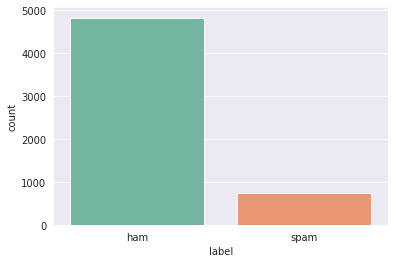

In [ ]:
sns.countplot(df['label'])

In [ ]:
df['count'] = df['message'].apply(len)

In [ ]:
df.head()

,label,message,count
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df.isna().sum()

label      0
message    0
count      0
dtype: int64

Visualise the length of spam and ham messages

<Figure size 1440x1440 with 0 Axes>

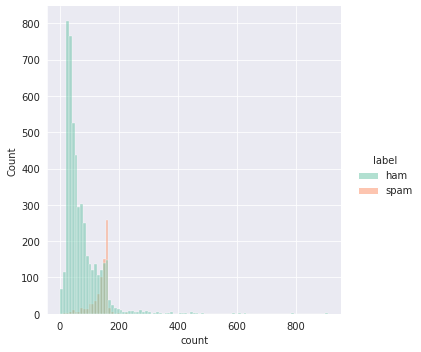

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.displot(x = 'count', hue = 'label', data =df)


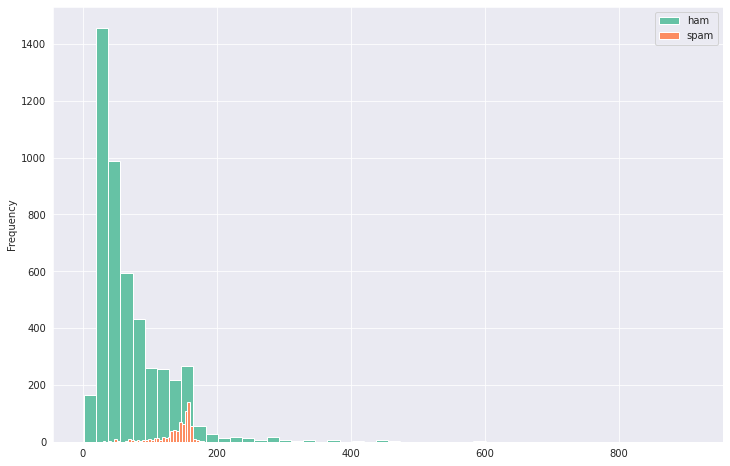

In [ ]:
plt.figure(figsize =(12,8))
df[df['label'] == 'ham']['count'].plot(kind = 'hist', bins = 50, label = 'ham')
df[df['label'] == 'spam']['count'].plot(kind = 'hist', bins = 50, label = 'spam')
plt.legend()

In [ ]:
import statistics
statistics.mean(df[df['label'] == 'spam']['count'])

138.8661311914324

In [ ]:
statistics.mean(df[df['label'] == 'ham']['count'])

71.02362694300518

In [ ]:
max(df[df['label'] == 'ham']['count'])

910

In [ ]:
pd.set_option('display.max_rows', 10)
df['label'][df['count'] > 200]

53      ham
126     ham
154     ham
333     ham
355     ham
       ... 
5374    ham
5451    ham
5515    ham
5535    ham
5557    ham
Name: label, Length: 112, dtype: object

In [ ]:
df['message'].iloc[1733]

'Hi, this is Mandy Sullivan calling from HOTMIX FM...you are chosen to receive å£5000.00 in our Easter Prize draw.....Please telephone 09041940223 to claim before 29/03/05 or your prize will be transferred to someone else....'

# Text Processing

In [ ]:
#text_processing
no_punc = []
lemma = WordNetLemmatizer()
def textpreprocessing(text):
  StopWords = stopwords.words('english')
  #remove punctuations
  no_punc = [char for char in text if char not in string.punctuation]
  no_punc = ''.join(no_punc)
  #remove digits
  no_punc = re.sub(r"\d", "", no_punc)
  #Convert to lower
  no_punc = ' '.join(char.lower() for char in no_punc.split())
  #Lemmatisation
  no_punc = ''.join([lemma.lemmatize(w) for w in no_punc])

  return ' '.join([word for word in no_punc.split() if word.lower() not in StopWords])

In [ ]:
df['Clean Message'] = df['message'].apply(textpreprocessing)


In [ ]:
df.head()

,label,message,count,Clean Message
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goes usf lives around though


In [ ]:
df['Clean Message'][2]

'free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs'

In [ ]:
df['label'] = df['label'].map({'ham':0, 'spam':1})

In [ ]:
df.head()

,label,message,count,Clean Message
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goes usf lives around though


# Training Model

In [ ]:
X = df['Clean Message']
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 101)

In [ ]:
#Create BIW
cv = CountVectorizer()
X_train_transform = cv.fit_transform(X_train)
X_test_transform  = cv.transform(X_test)

In [ ]:
#TF-IDF Transform
tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train_transform)
X_test_tfidf = tfidf.transform(X_test_transform)

In [ ]:
#Build Model
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_transform, y_train)
y_pred_class = nb.predict(X_test_tfidf)
from sklearn import metrics
round(metrics.accuracy_score(y_test, y_pred_class),2)

0.98

In [ ]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1209,    5],
       [  26,  153]])

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_transform, y_train)
forest_prediction = nb.predict(X_test_tfidf)
round(metrics.accuracy_score(y_test, forest_prediction),2)

0.98

In [ ]:
metrics.confusion_matrix(y_test, forest_prediction)

array([[1209,    5],
       [  26,  153]])